<a href="https://colab.research.google.com/github/Rajvee-Sharma/EDA-Airbnb-Capstone/blob/main/EDA_Colab_Notebbok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airbnb EDA Project by Rajvee Sharma-**

## **Breakdown of this notebook into 4 sections:**



1.   **Importing the required libraries**
2.   **Loading the Dataset**
3.   **Cleaning the Data:**


*  Dropping the duplicate values. 
*  Cleaning the individual columns.

*  Removing Null values from the Dataset.
*  Some transformations as per requirement.

4.  **Data Analysis and Visualisation:** Using different kinds of plot to find relation between the features.


*   What is the average price preferred by customers **OR** What we can learn from our prediction.
*  Which is the most demanded/busiest host of Airbnb.


*  Where most of the host focussed to own property. 
*  Finding top 20 hosts with most listings.


*  Find the total number of nights spend per room types.


















## **Question-**

**Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today Airbnb became one of the kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is the crucial factor for the company. These millions of listings generates a lot of data- data that can be analysed and used for security business decisions, understanding of customers and providers(hosts) behavior and performance on the platform, guiding marketing intiatives, implementation of innovative additional sevices and much more. This dataset has around 49000 observations in it with 16 columns and it is a mix between categorical and numeric values.**

In [15]:
#Importing all the libraries that are going to be used in EDA
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(12,10)

import seaborn as sns 

In [2]:
#Mounting google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#File path of Airbnb dataset
file_path = "/content/drive/MyDrive/Airbnb NYC 2019.csv"

In [4]:
#Accessed file path of dataset
df = pd.read_csv(file_path)

In [5]:
#Gives information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
#It gives top 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
#Removing the columns named latitude, longitude, last_review, review_per_month
df.drop(df.columns[[6,7,12,13]], axis=1, inplace=True)

In [8]:
#Information after dropping the particular columns
df.info

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

## **1. What is the average price preferred by the customers OR what we can learn from our predictions.**

In [9]:
#I'm going to remove null values from the given dataset
airbnb_df = df.dropna()

In [10]:
#Gives information after removing all the null values
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              48858 non-null  int64 
 1   name                            48858 non-null  object
 2   host_id                         48858 non-null  int64 
 3   host_name                       48858 non-null  object
 4   neighbourhood_group             48858 non-null  object
 5   neighbourhood                   48858 non-null  object
 6   room_type                       48858 non-null  object
 7   price                           48858 non-null  int64 
 8   minimum_nights                  48858 non-null  int64 
 9   number_of_reviews               48858 non-null  int64 
 10  calculated_host_listings_count  48858 non-null  int64 
 11  availability_365                48858 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ MB


In [14]:
#First look
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [15]:
#Describe method gives brief description about the numerical columns
airbnb_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [16]:
#This method gives number of missing values in the dataset
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
#Average price of property according to the locations
avg_preferred_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'], as_index=False).mean()
avg_preferred_price_df

,neighbourhood_group,room_type,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Bronx,Entire home/apt,2.271652e+07,1.037446e+08,127.645503,5.962963,30.661376,1.867725,158.349206
1,Bronx,Private room,2.235896e+07,1.060786e+08,66.788344,3.858896,25.018405,2.338957,171.331288
2,Bronx,Shared room,2.729281e+07,1.130364e+08,58.610169,3.406780,7.322034,3.457627,150.644068
3,Brooklyn,Entire home/apt,1.730696e+07,4.863160e+07,178.362609,6.531247,27.921491,1.838166,97.161311
4,Brooklyn,Private room,1.894897e+07,6.243423e+07,76.510619,5.541638,21.105107,2.548553,99.964240
5,Brooklyn,Shared room,2.358634e+07,1.040423e+08,50.527845,7.753027,14.026634,6.171913,178.007264
6,Manhattan,Entire home/apt,1.867447e+07,6.560120e+07,249.238211,10.468613,17.818878,18.934647,117.151175
7,Manhattan,Private room,1.881269e+07,6.979826e+07,116.805594,5.451273,26.191271,3.189640,101.914963
8,Manhattan,Shared room,2.115615e+07,9.666720e+07,88.977083,6.766667,21.400000,3.885417,138.572917
9,Queens,Entire home/apt,2.112772e+07,8.713280e+07,147.050573,5.369752,28.933206,1.677958,132.267176


In [18]:
df_1 = avg_preferred_price_df[['neighbourhood_group','room_type','price']]
df_1

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.645503
1,Bronx,Private room,66.788344
2,Bronx,Shared room,58.610169
3,Brooklyn,Entire home/apt,178.362609
4,Brooklyn,Private room,76.510619
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.238211
7,Manhattan,Private room,116.805594
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [19]:
#Get the renamed columns
df_true = df_1.rename(columns= {'neighbourhood_group':'location','price':'mean_price'})
df_true

,location,room_type,mean_price
0,Bronx,Entire home/apt,127.645503
1,Bronx,Private room,66.788344
2,Bronx,Shared room,58.610169
3,Brooklyn,Entire home/apt,178.362609
4,Brooklyn,Private room,76.510619
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.238211
7,Manhattan,Private room,116.805594
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [20]:
#Unstack returns the DataFrame having new columns
df_true = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
df_true

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,66.788344,58.610169
Brooklyn,178.362609,76.510619,50.527845
Manhattan,249.238211,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


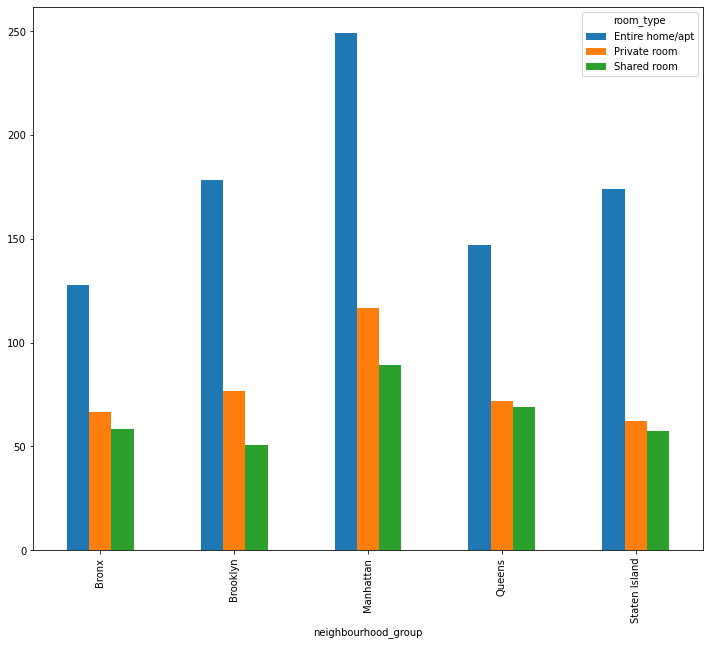

In [21]:
#Bar graph of average price of property according to the location
df_true.plot.bar()

## **2. Which is the most demanded/busiest host of Airbnb.**

In [22]:
#Based on number of reviews we get popular host
demanded_host_df = airbnb_df.groupby(['host_id','host_name'], as_index=False)['number_of_reviews'].sum()

In [23]:
demanded_host_df.sort_values(['number_of_reviews'])

,host_id,host_name,number_of_reviews
18712,26794324,Quinten,0
17439,23386756,Daniel,0
17440,23387829,Auroni,0
17448,23401743,Ticemen,0
17450,23419046,Rema,0
...,...,...,...
21911,40176101,Brady,1818
20863,35524316,Yasu & Akiko,1971
18619,26432133,Danielle,2017
1052,344035,Brooklyn& Breakfast -Len-,2205


In [24]:
#Bases on availability in a year we get popular host
demanded_host_df_1 = airbnb_df.groupby(['host_id','host_name'], as_index=False)['availability_365'].mean()

In [25]:
#Get the value according to ascending order by using sort value operation
demanded_host_df_1.sort_values(['availability_365'])

,host_id,host_name,availability_365
0,2438,Tasos,0.0
22244,41764756,Luz,0.0
22243,41762539,Maria,0.0
22242,41760536,Austin,0.0
22241,41757762,Sara,0.0
...,...,...,...
1787,746552,Tom,365.0
27208,76862848,Alexis,365.0
22042,40733012,Victor,365.0
1829,772862,Jesse,365.0


In [26]:
#Merge two DataFrames based on number of reviews and availability in a year
popular_host_df = pd.merge(demanded_host_df,demanded_host_df_1, on=['host_id','host_name'])

In [27]:
total_host_df = popular_host_df.sort_values(['availability_365','number_of_reviews'], ascending=[True,False])
total_host_df

,host_id,host_name,number_of_reviews,availability_365
17263,22959695,Gurpreet Singh,1157,0.0
28792,99392252,Michael,732,0.0
30113,121391142,Deloris,693,0.0
1864,792159,Wanda,480,0.0
21398,37818581,Sofia,479,0.0
...,...,...,...,...
37281,271336460,Belinda,0,365.0
37344,272609175,Avi,0,365.0
37357,272870209,Edna,0,365.0
37362,273038911,Denise,0,365.0


In [28]:
#Get the firstlook of our merged DataFrame
total_host_df.head()

,host_id,host_name,number_of_reviews,availability_365
17263,22959695,Gurpreet Singh,1157,0.0
28792,99392252,Michael,732,0.0
30113,121391142,Deloris,693,0.0
1864,792159,Wanda,480,0.0
21398,37818581,Sofia,479,0.0


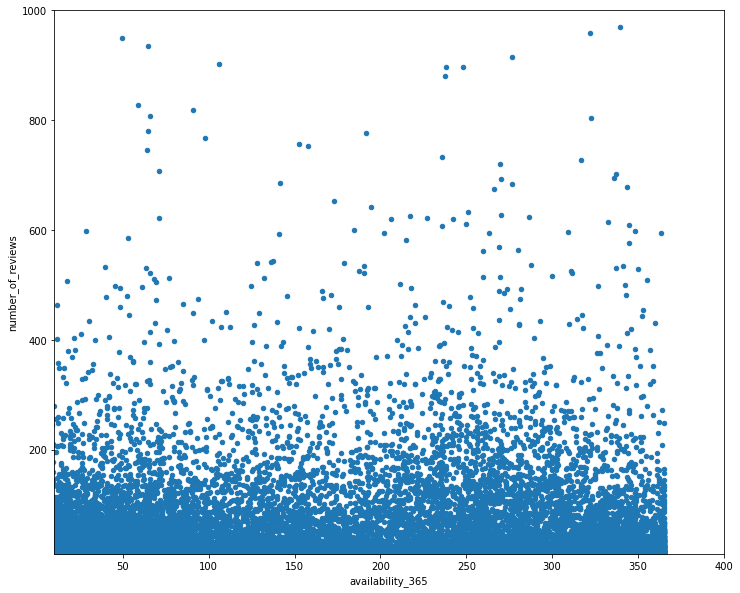

In [29]:
#Creating the scatter plot based on number of reviews and availablility in a year
total_host_df.plot.scatter(x='availability_365',y='number_of_reviews', xlim=(10,400), ylim=(10,1000))

## **3. Where most of the host focused to own property.**

In [30]:
#Use groupby operation on neighbourhood group to find number of host according to location
host_per_location = airbnb_df.groupby('neighbourhood_group', as_index=False)['host_id'].count()

In [31]:
#Get the renamed column after applying rename operation
no_of_host = host_per_location.sort_values(['host_id'], ascending=False).rename(columns={'neighbourhood_group':'location','host_id':'owner'})
no_of_host

,location,owner
2,Manhattan,21643
1,Brooklyn,20089
3,Queens,5664
0,Bronx,1089
4,Staten Island,373


## **Answer: Manhattan is the most focused place for host**

In [32]:
#Using count method so that we get dataset without index
no_of_host = airbnb_df.groupby('neighbourhood_group')['host_id'].count()
no_of_host

neighbourhood_group
Bronx             1089
Brooklyn         20089
Manhattan        21643
Queens            5664
Staten Island      373
Name: host_id, dtype: int64

Text(0, 0.5, 'Location')

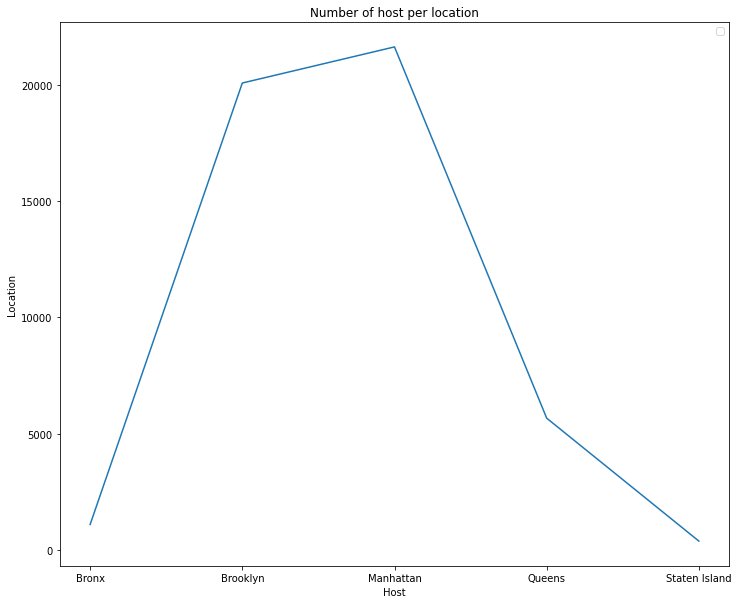

In [33]:
#Plotting the line graph
plt.legend(labels= ['No. of host'])
plt.plot(no_of_host)
plt.title('Number of host per location')
plt.xlabel('Host')
plt.ylabel('Location')

In [34]:
#Get the information about the numerical columns
airbnb_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


Points to be noted:

1. Here we can see that there is a minimum price of 0$ we have to fix seat anyway because airbnb is not provided free stay in any of the hotel. Sol: For that we have to check where the price is 0. We create one function as per minimum nights the price will be set as per formula [Refer below cells for more details]

2. There are some entries in dataset where minimum nights = 1 but it's respective price is 0. Sol: We replace the price value with the mean value of price which amount is less than 100$.[Refer below cells for more details]

In [35]:
#Identify the observations where minimum nights =1 and price is also minimum
airbnb_df[airbnb_df['minimum_nights'] ==1].sort_values(['price','minimum_nights'], ascending=[True,True])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,93,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,222
21700,17437106,Couch in Harlem Harvey Refugees only,33511962,Morgan,Manhattan,Harlem,Shared room,10,1,0,1,0
22835,18490141,IT'S SIMPLY CONVENIENT!,97001292,Maria,Queens,Jamaica,Entire home/apt,10,1,43,1,252
...,...,...,...,...,...,...,...,...,...,...,...,...
44034,33998396,3000 sq ft daylight photo studio,3750764,Kevin,Manhattan,Chelsea,Entire home/apt,6800,1,0,6,364
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,Entire home/apt,7500,1,0,1,364
45666,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,Private room,7500,1,8,2,179
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,Entire home/apt,7703,1,0,12,146


In [36]:
#Get the number of values where price is less than 100$
airbnb_df.loc[airbnb_df['price']<100]['price'].count()

21861

In [37]:
#Create the additional copy of original DataFrame
airbnb_price_df = airbnb_df.copy()

In [38]:
#Get the mean value of price which is less than 100$
round(airbnb_df.loc[airbnb_df['price']<100, 'price'].mean())

65

In [39]:
#Change the value of price where minimum night is 1 and price of property is less than 50$
airbnb_price_df['price'] = np.where((airbnb_price_df['price'] <= 50) & (airbnb_price_df['minimum_nights'] == 1), round(airbnb_df.loc[airbnb_df['price']< 100, 'price'].mean()), airbnb_price_df['price'])

In [40]:
#Get the DataFrame without index and still 8 rows having amount=0$
airbnb_price_df[airbnb_price_df['price'] ==0].count()

id                                8
name                              8
host_id                           8
host_name                         8
neighbourhood_group               8
neighbourhood                     8
room_type                         8
price                             8
minimum_nights                    8
number_of_reviews                 8
calculated_host_listings_count    8
availability_365                  8
dtype: int64

In [41]:
#Finding those observation where price is still 0$
airbnb_price_df[airbnb_price_df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,Private room,0,4,1,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,Private room,0,2,55,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,Private room,0,2,16,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,Private room,0,2,12,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,Entire home/apt,0,5,3,1,73
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,Entire home/apt,0,3,0,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,Shared room,0,30,2,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,Shared room,0,30,5,6,139


In [42]:
#Get the new price according to the minimum nights using function operation
def price_calculator(min_night):
  '''Get the price based on minimum night you are given'''
  mean_price = round(airbnb_df.loc[airbnb_df['price']<100, 'price'].mean())
  new_price = mean_price*min_night

  return new_price

In [43]:
#Replace the value of price according to minimum nights where price = 0$
airbnb_price_df['price'] = np.where((airbnb_price_df['price'] ==0 ), price_calculator(airbnb_price_df['minimum_nights']), airbnb_price_df['price'])

In [44]:
#Get the numerical description
airbnb_price_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,153.846801,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.078850,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,10.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


## **4. Finding top 20 host with most listings.**

In [45]:
#Get the total count on host id
airbnb_df['host_id'].count()

48858

In [46]:
host_id_count = list(airbnb_df['host_id'].value_counts())
id_host = list(airbnb_df.host_id)

In [47]:
list_count = list(zip(id_host,host_id_count))
host_id_count_df = pd.DataFrame(list_count)
host_id_count_df

,0,1
0,2787,327
1,2845,232
2,4632,121
3,4869,103
4,7192,96
...,...,...
37420,14631757,1
37421,213208277,1
37422,213208277,1
37423,44358422,1


In [48]:
#Renaming the particular columns of dataset
host_id_count_df.rename(columns={0:'host_id',1:'num_occurence'})

,host_id,num_occurence
0,2787,327
1,2845,232
2,4632,121
3,4869,103
4,7192,96
...,...,...
37420,14631757,1
37421,213208277,1
37422,213208277,1
37423,44358422,1


In [49]:
#Get the first 20 hosts with most listings
x = host_id_count_df.head(20)
print(x)

        0    1
0    2787  327
1    2845  232
2    4632  121
3    4869  103
4    7192   96
5    7322   96
6    7356   91
7    8967   87
8    7490   65
9    7549   52
10   7702   52
11   7989   50
12   9744   49
13  11528   49
14  11975   47
15  15991   43
16  17571   39
17  18946   37
18  20950   34
19  17985   34


In [50]:
#Renaming the columns
ab = x.rename(columns={0:'host_id',1:'num_occurence'})
ab

,host_id,num_occurence
0,2787,327
1,2845,232
2,4632,121
3,4869,103
4,7192,96
5,7322,96
6,7356,91
7,8967,87
8,7490,65
9,7549,52


[Text(0, 0, '2787'),
 Text(0, 0, '2845'),
 Text(0, 0, '4632'),
 Text(0, 0, '4869'),
 Text(0, 0, '7192'),
 Text(0, 0, '7322'),
 Text(0, 0, '7356'),
 Text(0, 0, '8967'),
 Text(0, 0, '7490'),
 Text(0, 0, '7702'),
 Text(0, 0, '7549'),
 Text(0, 0, '7989'),
 Text(0, 0, '9744'),
 Text(0, 0, '11528'),
 Text(0, 0, '11975'),
 Text(0, 0, '15991'),
 Text(0, 0, '17571'),
 Text(0, 0, '18946'),
 Text(0, 0, '20950'),
 Text(0, 0, '17985')]

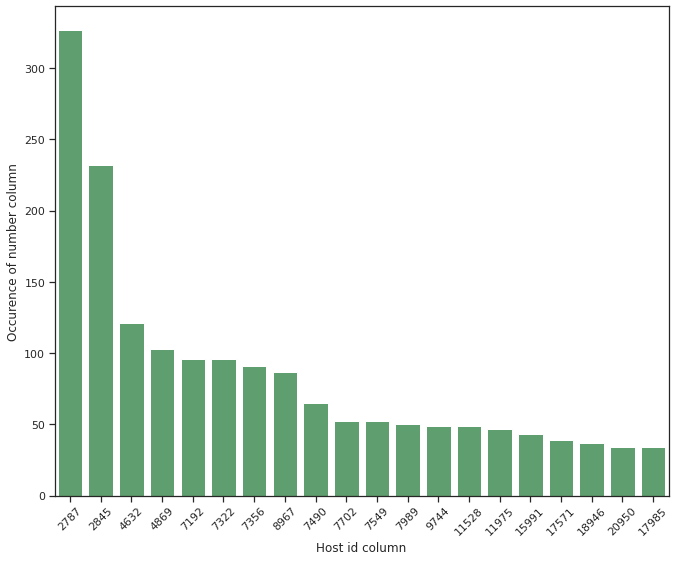

In [51]:
sns.set(rc={'figure.figsize':(11,9)})

#Setting background colour of chart as ticks
sns.set_style('ticks')

#Plotting the chart
bar_viz = sns.barplot(x='host_id',y='num_occurence', color='g', data=ab,
                      order = ab.sort_values('num_occurence',ascending=False).host_id)

#Set the font size for the tittle
sns.set(font_scale=2)

#Name given to x and y axis
bar_viz.set_xlabel('Host id column')
bar_viz.set_ylabel('Occurence of number column')

#Adjusting the bar labels
bar_viz.set_xticklabels(bar_viz.get_xticklabels(), rotation=45)

## **5. Find total number of nights spend per room type.**

In [11]:
#Get the unique values of room type
list(airbnb_df['room_type'].unique())

['Private room', 'Entire home/apt', 'Shared room']

In [12]:
#Find the nights spend by customer across different room type
total_no_of_rooms = airbnb_df.groupby('room_type')['minimum_nights'].sum().reset_index()
room_type = total_no_of_rooms.sort_values('minimum_nights', ascending=False)
room_type


,room_type,minimum_nights
0,Entire home/apt,215081
1,Private room,120023
2,Shared room,7510


In [17]:
#Creating dataset
labels = list(room_type['room_type'])
sizes = list(room_type['minimum_nights'])

colors = ['yellow', 'pink', 'blue']

explode =(0.05,0.05,0.05)


<function matplotlib.pyplot.show>

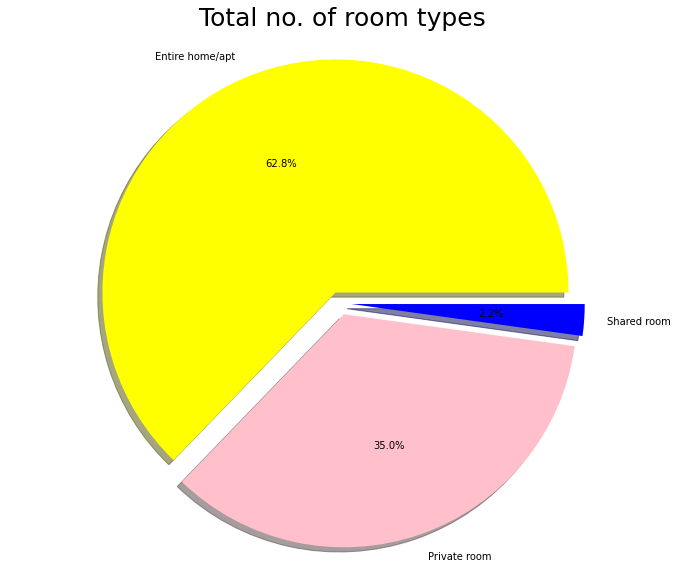

In [18]:
#Create pie chart of total number of nights spend per room types
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow= True)
plt.title('Total no. of room types', fontsize=25)
plt.axis('equal')
plt.show

## **Conclusion-**

1. Manhattan is the most focused place in New York to do their business.
2. Average price preferred by customers in entire home/apt is around 155, for shared room is around 60 and for private room is around 73 $.
3. Average number of people spend their night in entire home/apt = 62.8%, and in private room is around = 35.0% and in shared room = 2.2%
4. More number of customers Manhattan location for night stay than Brooklyn.
5. Host id 2787 has maximum number of listings i.e, more than 300.
6. Manhattan location has maximum number of hosts as compared to others.